In [150]:
import numpy as np
import copy
import matplotlib.pyplot as plt

In [2]:
def is_inside(point,rectangle):
    return point[0]>=rectangle[0] and point[0]<=rectangle[1] and point[1]>=rectangle[2] and point[1] <= rectangle[3]
    

In [144]:
board_size=6;
margin=0;
L=board_size+2*margin;

# space for h
Hypothesis=[]; # top left and bottom right squares denoting the rectangle
for x_left in range(margin,margin+board_size-1):
    for x_right in range(x_left+1,margin+board_size):
        for y_top in range(margin,margin+board_size-1):
            for y_bottom in range(y_top+1,margin+board_size):
                Hypothesis.append([x_left,x_right,y_top,y_bottom]);

points=[]; # space for the X variable
for i in range(0,L):
    for j in range(0,L):
        points.append([i,j]);
        
labels=[0,1]; # space for the Y variable : 0 means outside; 1 means inside
                
Prior_h=1/len(Hypothesis);
Prior_points=1/len(points);        

Posterior_L=np.zeros([len(Hypothesis),len(points),len(labels)]);
Posterior_T=np.zeros([len(Hypothesis),len(points),len(labels)]);

# initiate Posterior_L
for i_h in range(0,len(Hypothesis)):
    h=Hypothesis[i_h];
    for i_x in range(0,len(points)):
        x=points[i_x];
        for i_y in range(0,len(labels)):
            y=labels[i_y];
            Posterior_L[i_h,i_x,i_y]=is_inside(x,h)==y;
norm=np.sum(Posterior_L,0);

for i_h in range(0,len(Hypothesis)):
    for i_x in range(0,len(points)):
        for i_y in range(0,len(labels)):
            if norm[i_x,i_y] > 0:
                Posterior_L[i_h,i_x,i_y]=Posterior_L[i_h,i_x,i_y]/norm[i_x,i_y];
            else:
                if Posterior_L[i_h,i_x,i_y]>0:
                    print('error')

                    
for it in range(0,10):   
    Prev_Post_T=copy.deepcopy(Posterior_T);    

    # update Posterior_T
    for i_h in range(0,len(Hypothesis)):
        for i_x in range(0,len(points)):
            for i_y in range(0,len(labels)):                  
                Posterior_T[i_h,i_x,i_y]=Posterior_L[i_h,i_x,i_y]/sum(sum(Posterior_L[i_h,:,:]))                
                

    # update Posterior_L
    for i_h in range(0,len(Hypothesis)):
        for i_x in range(0,len(points)):
            for i_y in range(0,len(labels)):
                Posterior_L[i_h,i_x,i_y]=Posterior_T[i_h,i_x,i_y]/ sum(Posterior_T[:,i_x,i_y]);
                
                
    # compute distance to previous distributions
    Dkl_T=np.zeros(len(Hypothesis));
    for i_h in range(0,len(Hypothesis)):        
        for i_x in range(0,len(points)):
            for i_y in range(0,len(labels)):
                if Prev_Post_T[i_h,i_x,i_y]>0:
                    Dkl_T[i]=Dkl_T[i]-Prev_Post_T[i_h,i_x,i_y]*np.log(Posterior_T[i_h,i_x,i_y]/Prev_Post_T[i_h,i_x,i_y])
    print(sum(Dkl_T))
    


# check normalization of Posterior_L                
#for i_x in range(0,len(points)):
#    for i_y in range(0,len(labels)):
#        print(np.sum(Posterior_L[:,i_x,i_y]))

# check normalization of Posterior_T        
#for i_h in range(0,len(Hypothesis)):
#        print(sum(sum(Posterior_T[i_h,:,:])))
        

        

0.0
0.601286111378
0.0229371330014
0.00093884706054
3.92220331239e-05
1.64770260529e-06
6.93221989615e-08
2.91769631265e-09
1.22817753438e-10
5.16737815659e-12


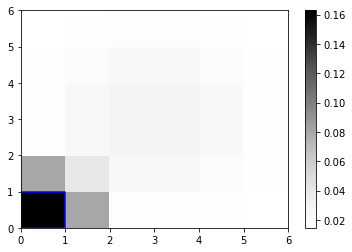

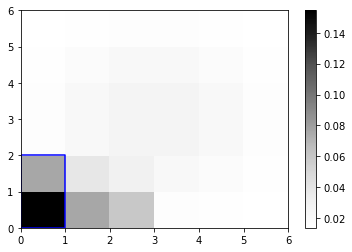

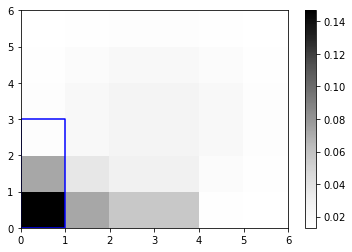

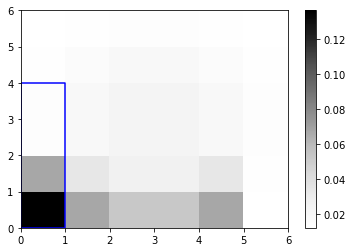

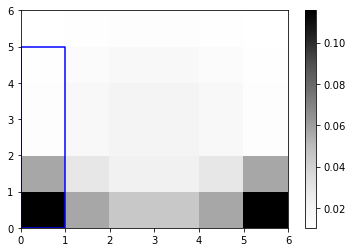

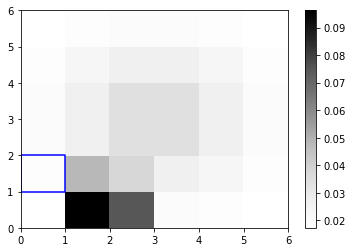

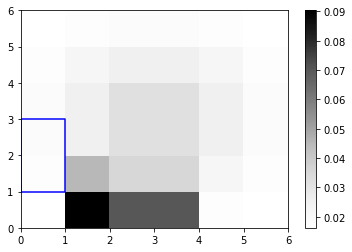

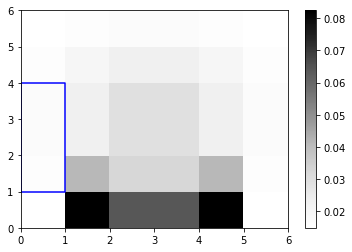

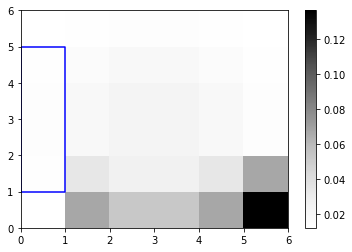

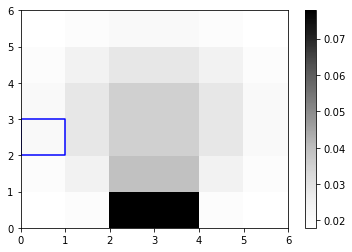

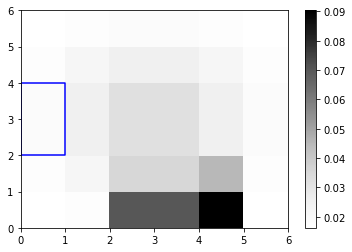

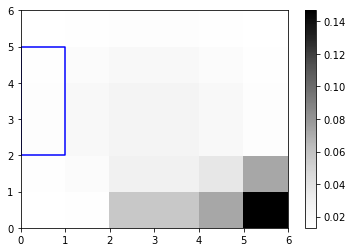

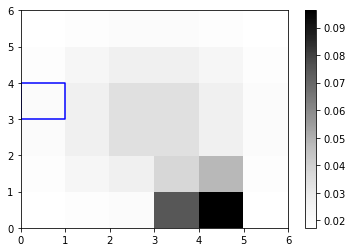

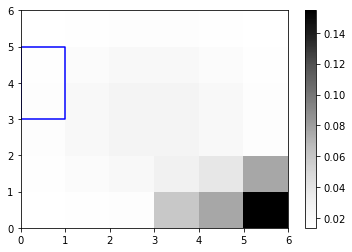

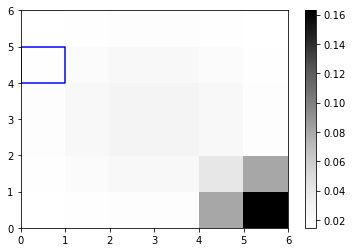

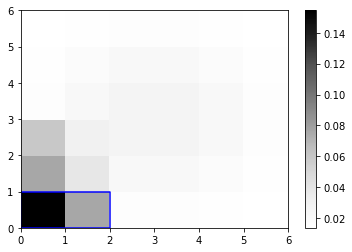

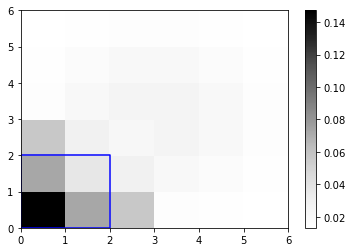

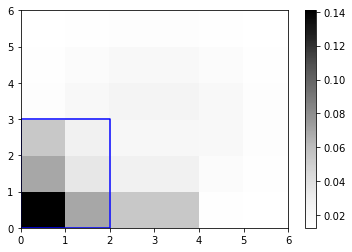

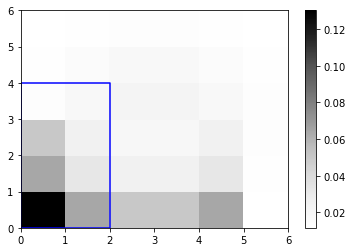

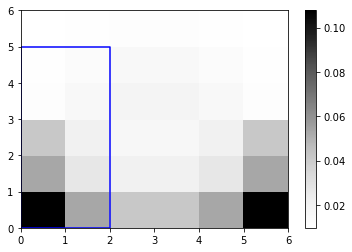

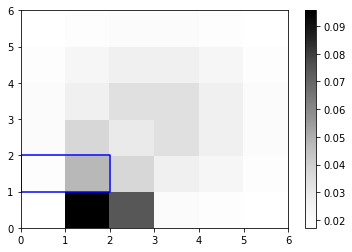

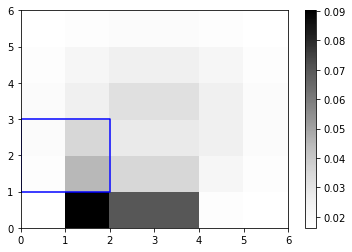

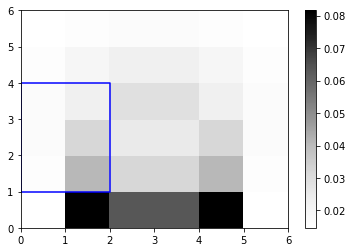

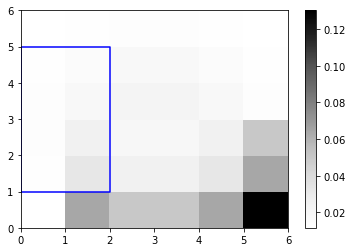

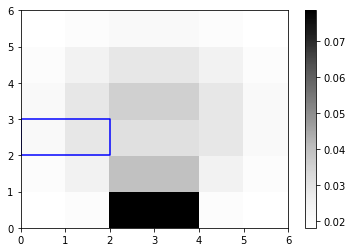

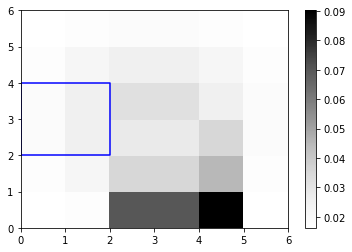

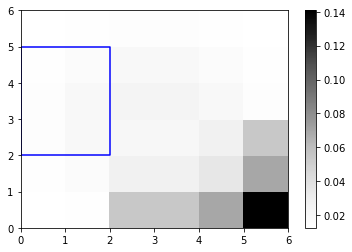

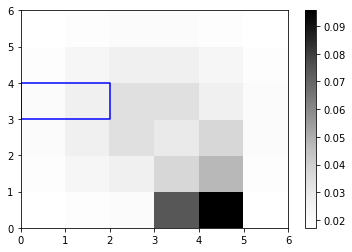

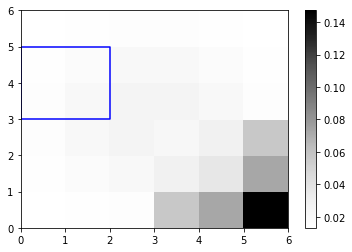

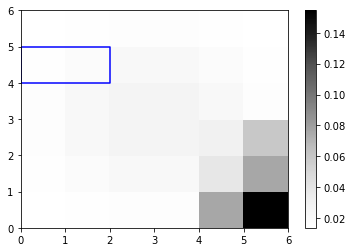

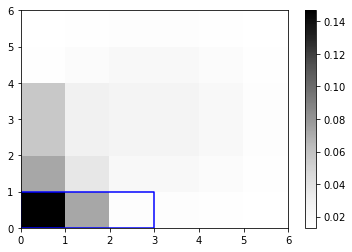

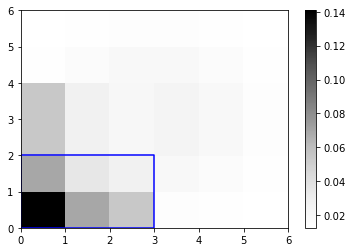

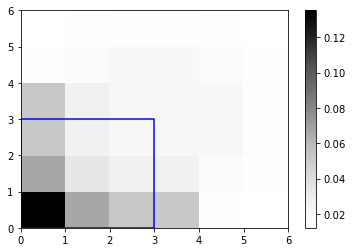

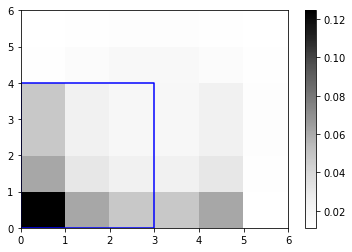

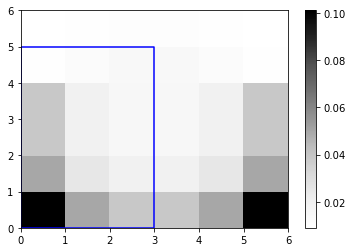

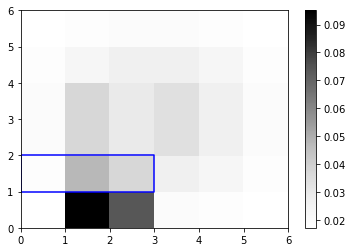

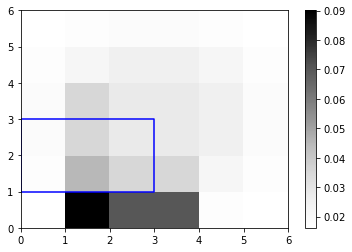

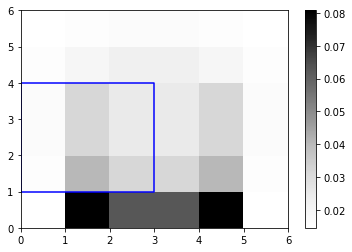

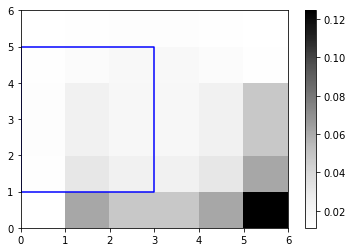

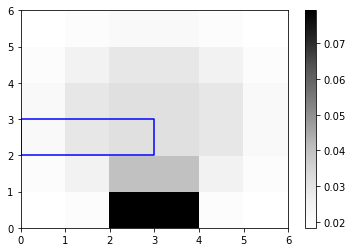

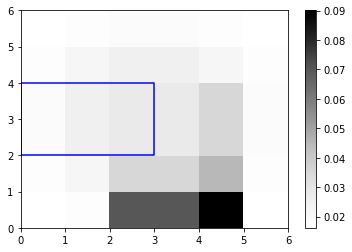

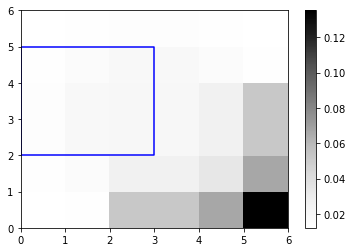

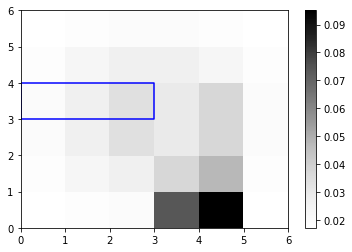

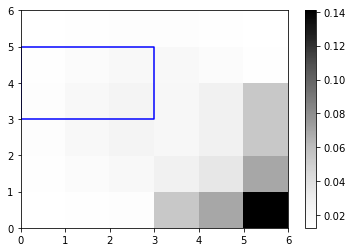

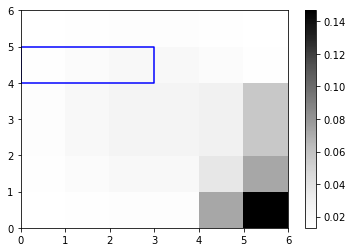

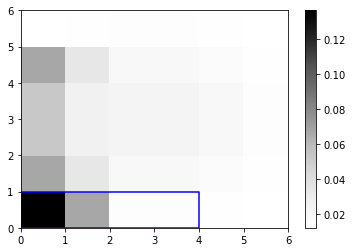

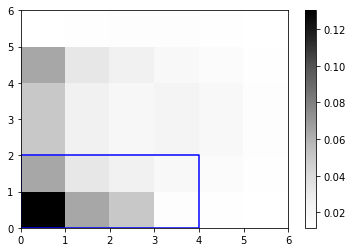

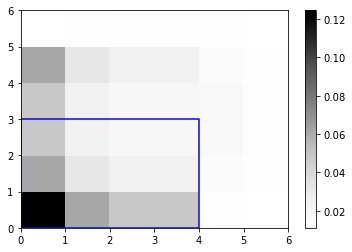

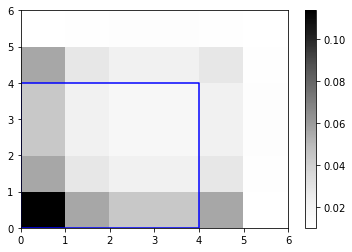

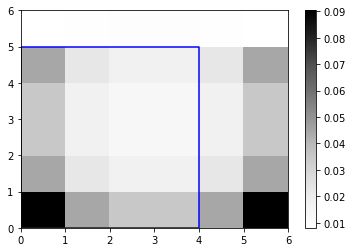

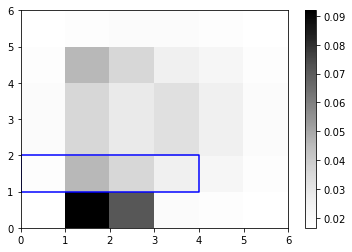

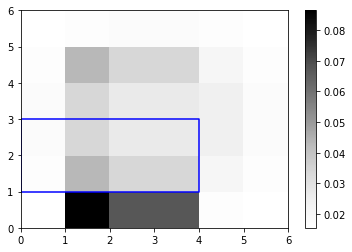

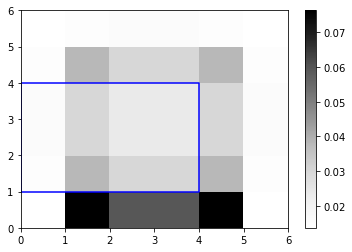

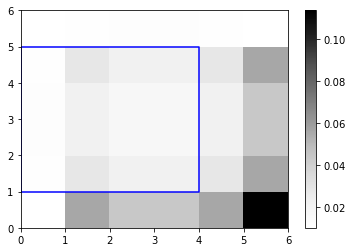

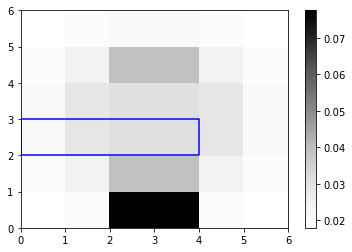

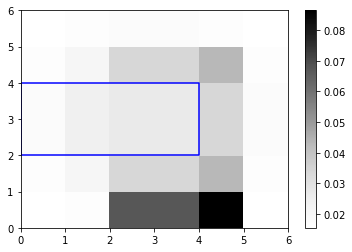

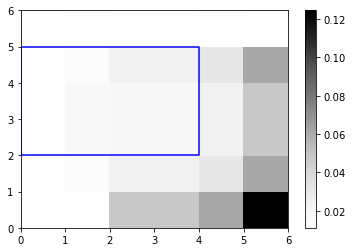

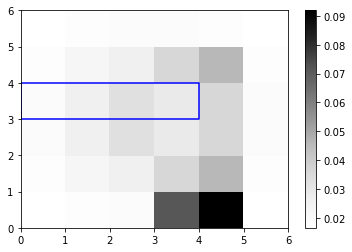

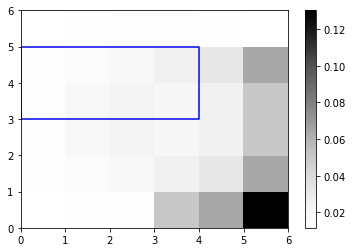

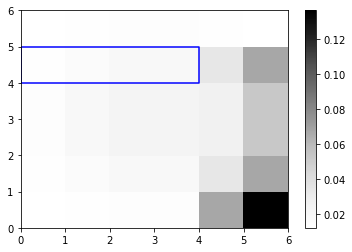

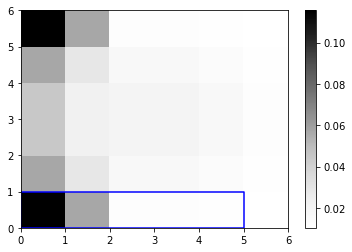

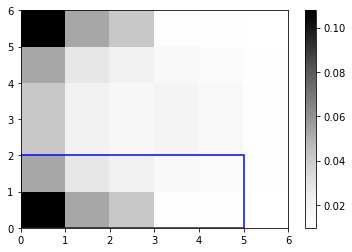

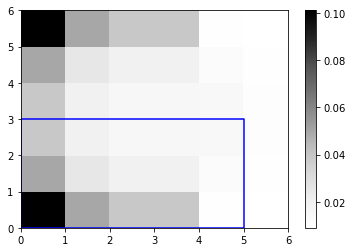

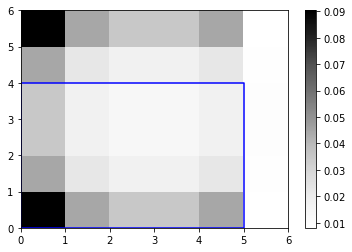

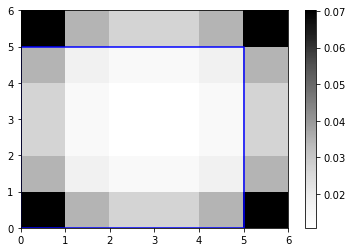

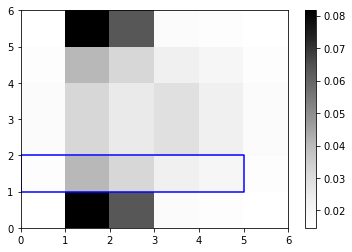

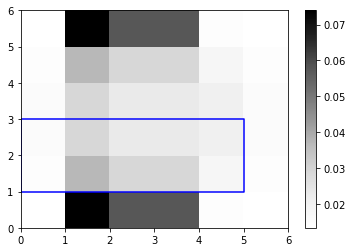

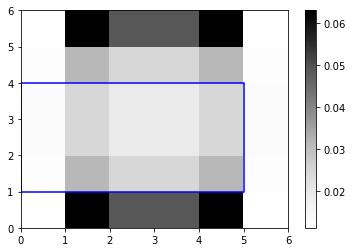

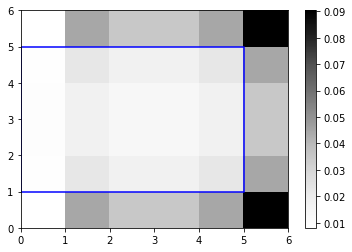

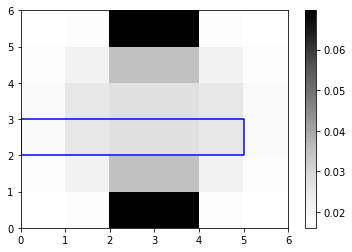

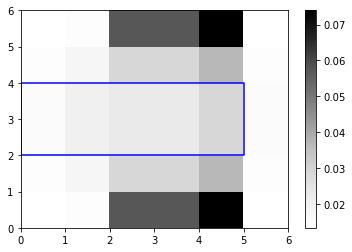

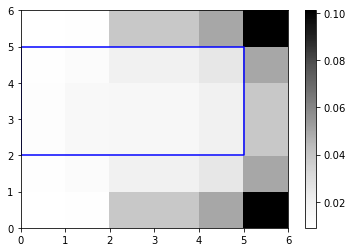

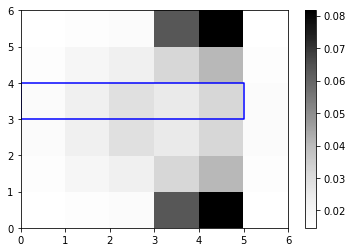

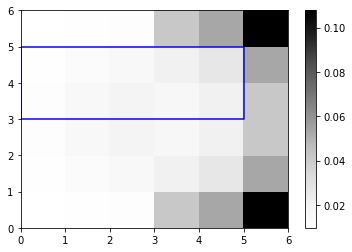

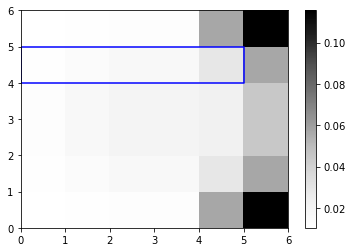

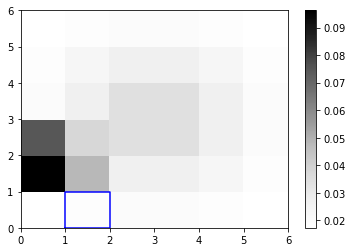

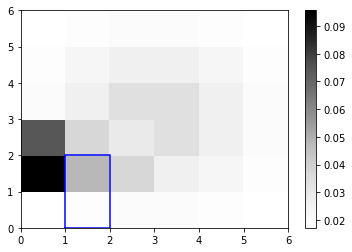

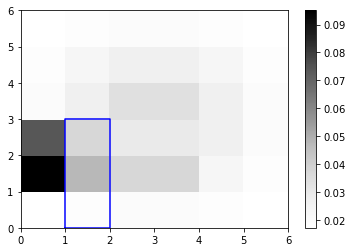

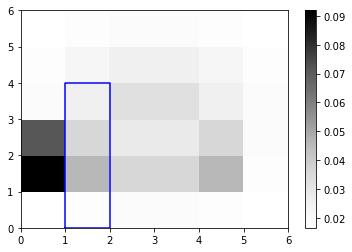

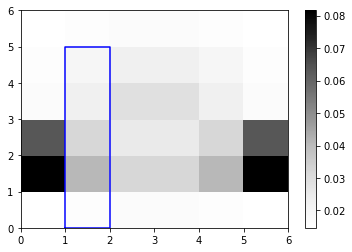

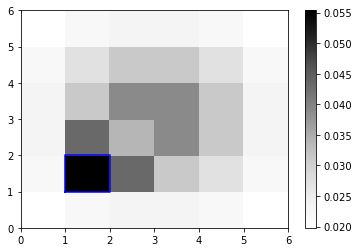

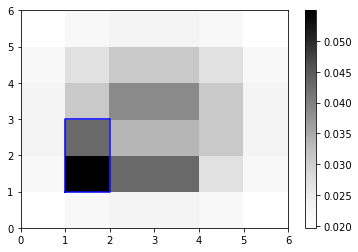

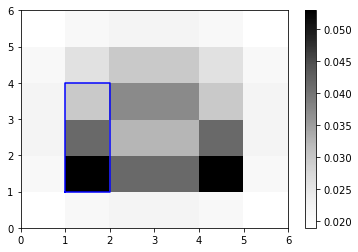

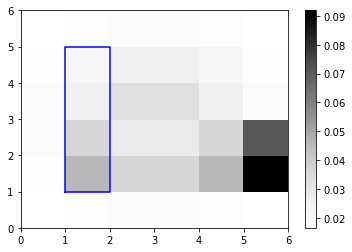

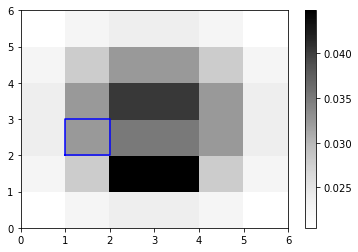

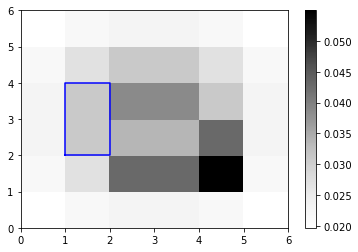

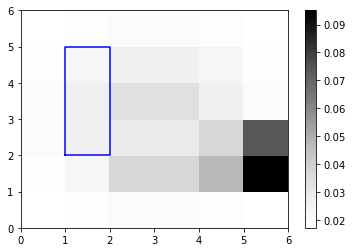

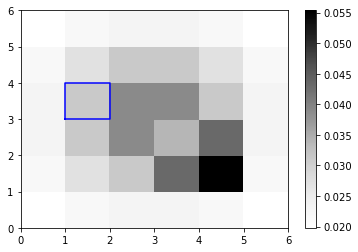

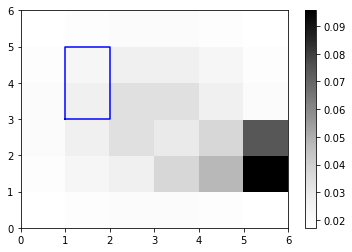

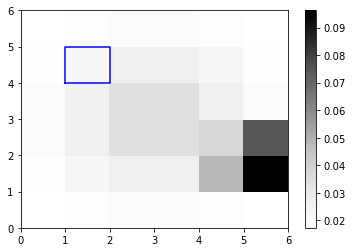

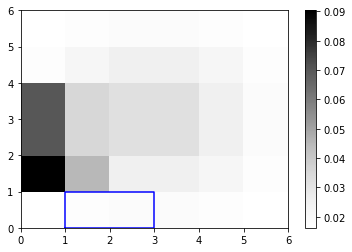

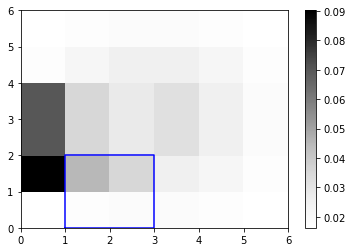

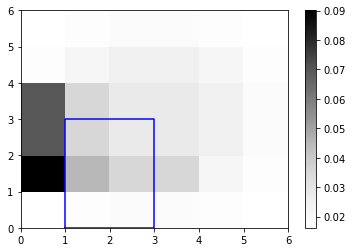

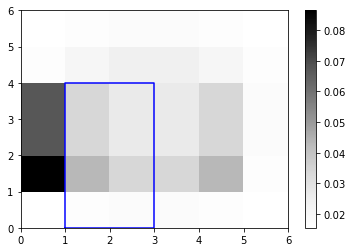

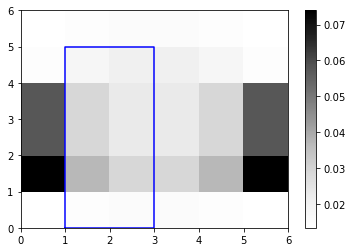

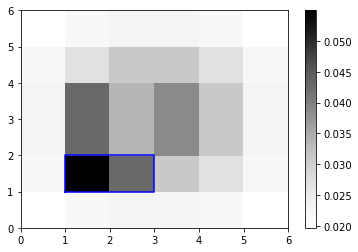

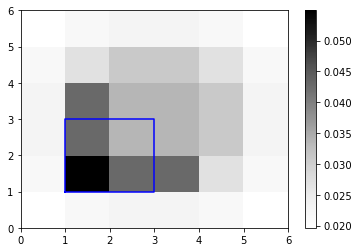

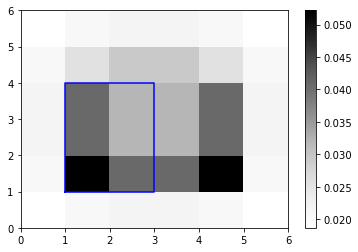

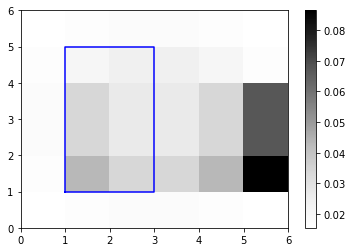

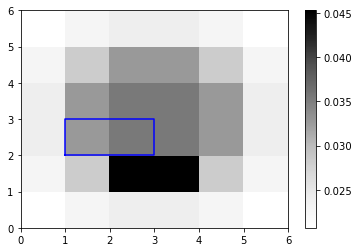

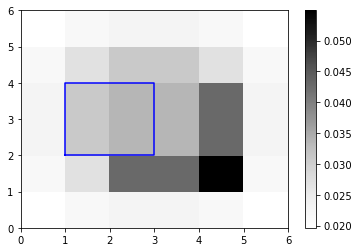

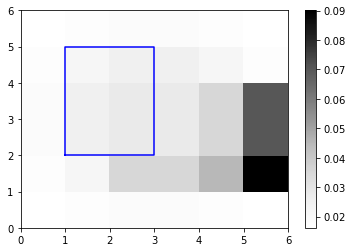

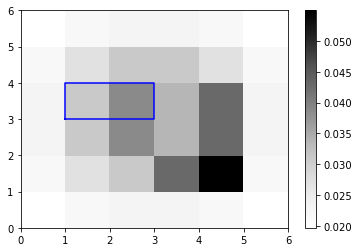

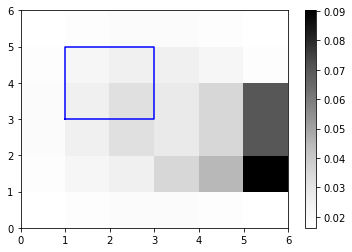

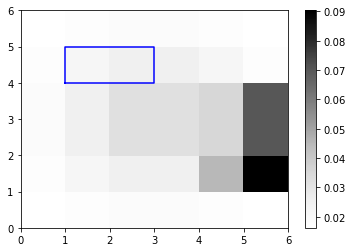

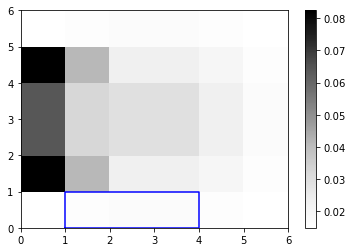

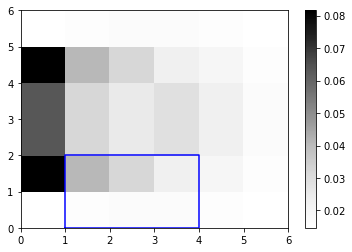

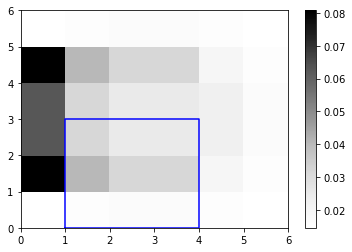

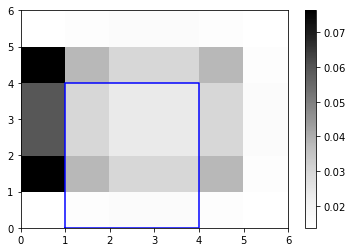

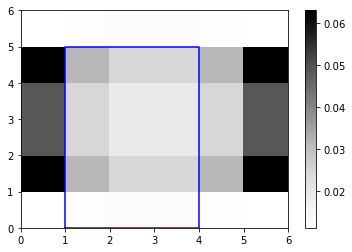

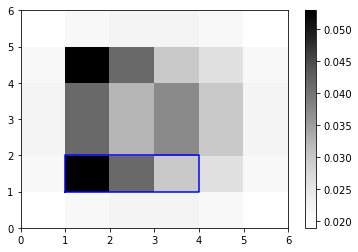

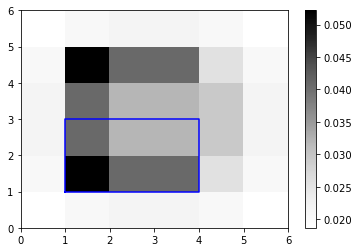

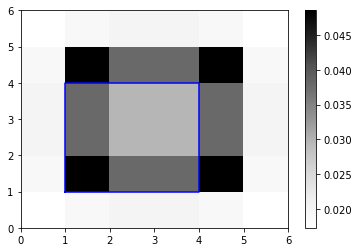

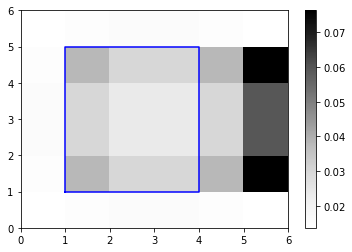

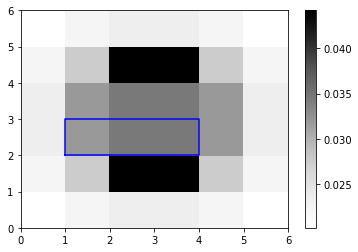

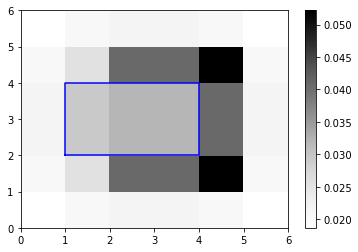

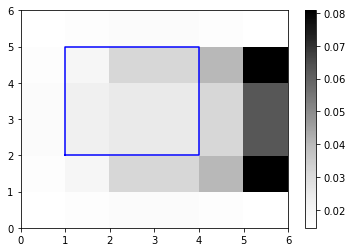

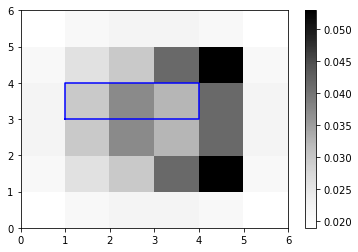

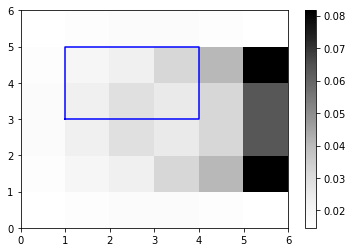

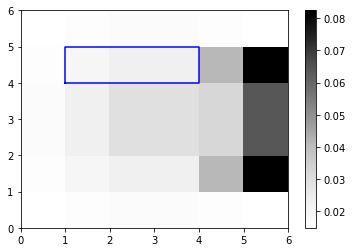

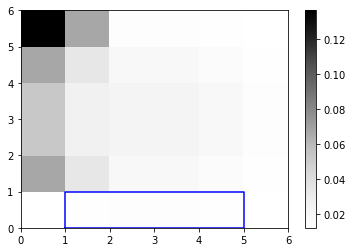

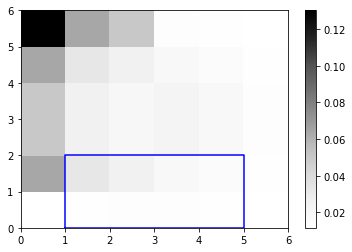

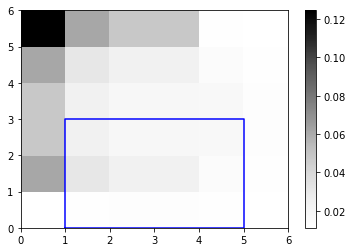

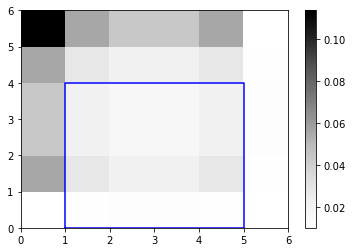

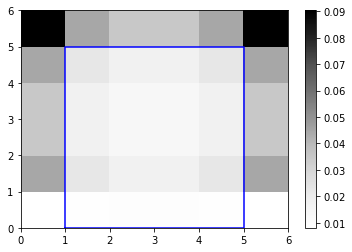

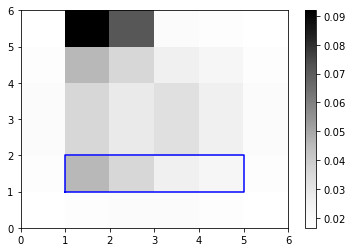

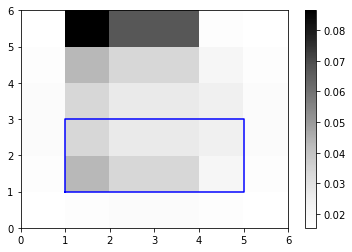

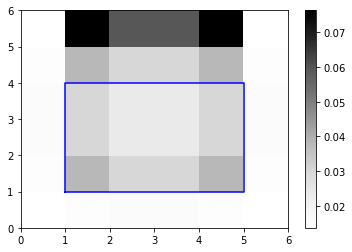

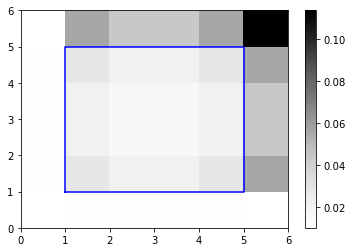

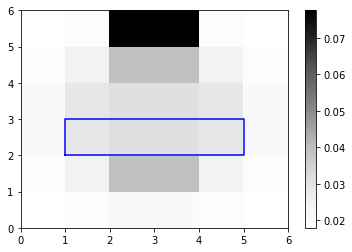

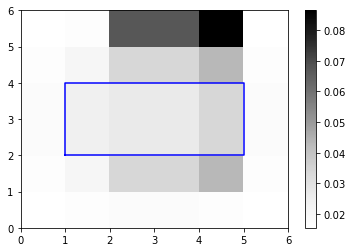

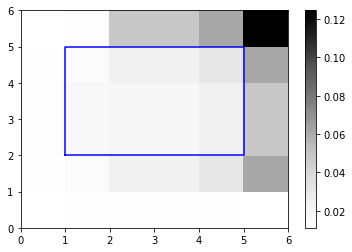

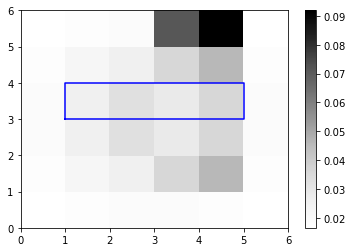

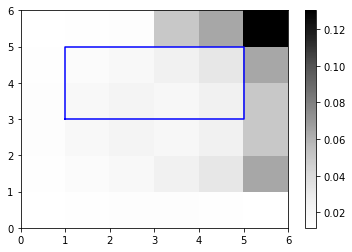

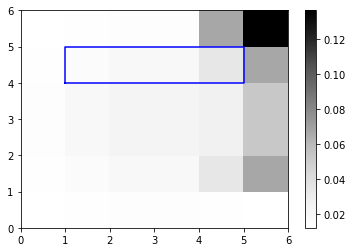

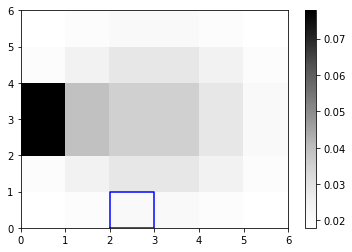

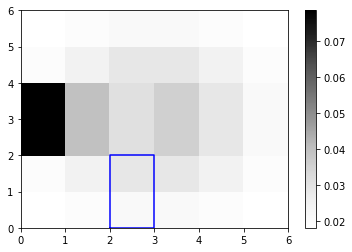

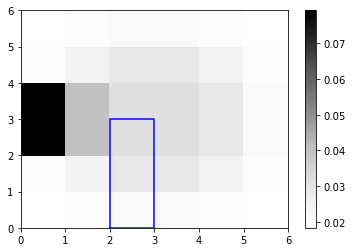

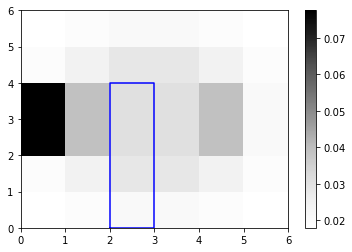

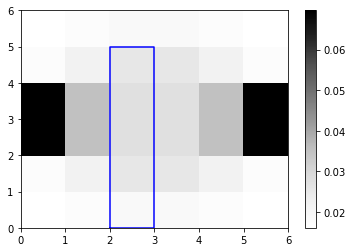

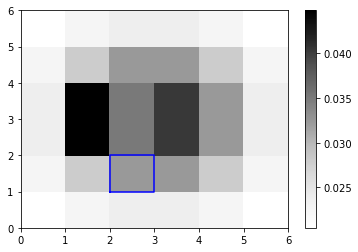

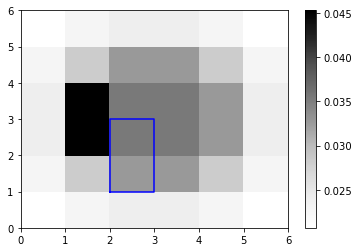

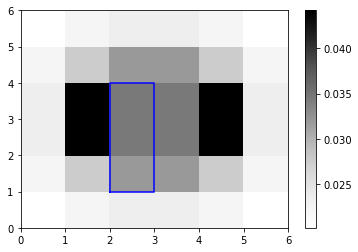

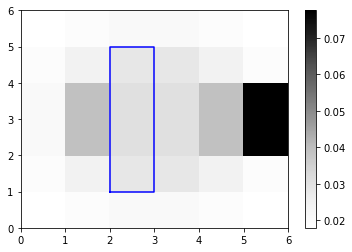

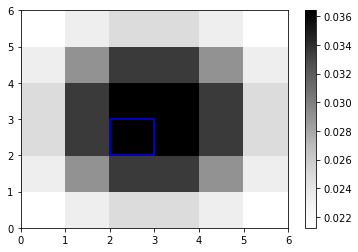

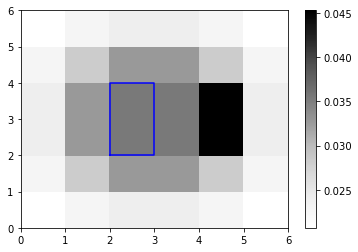

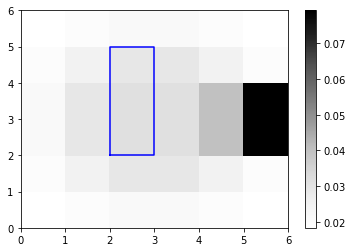

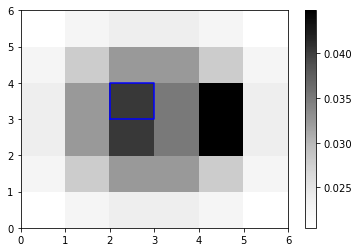

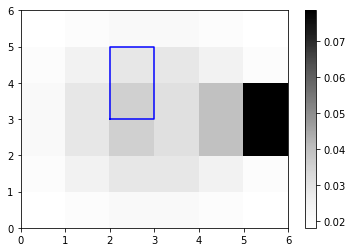

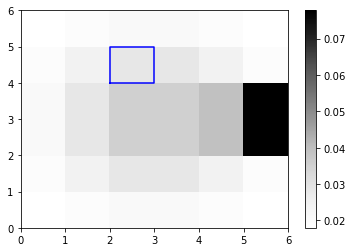

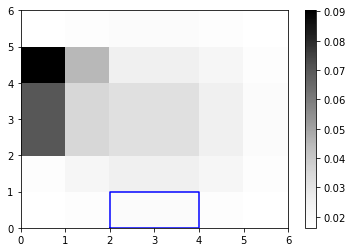

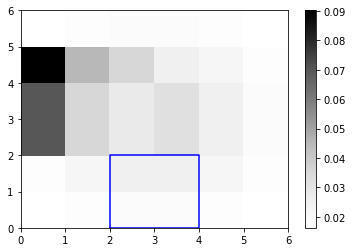

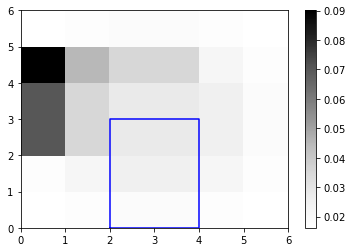

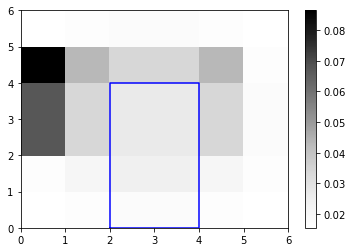

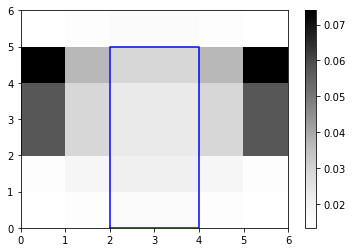

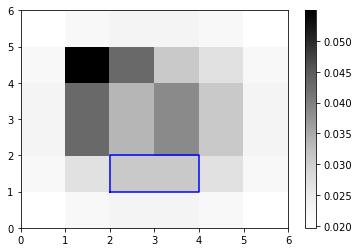

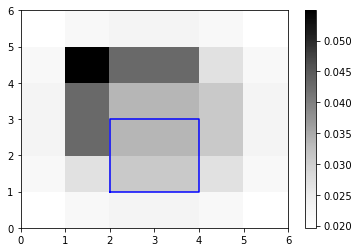

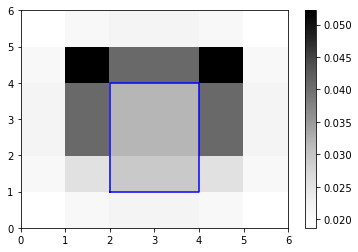

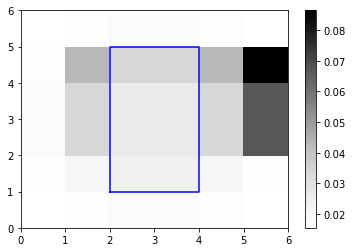

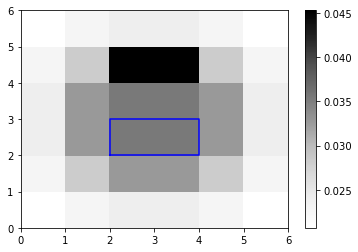

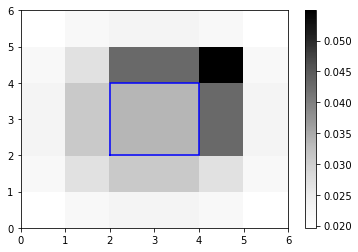

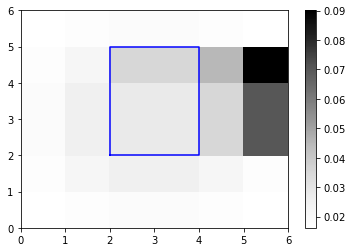

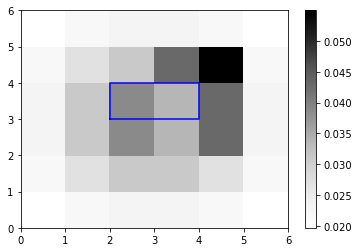

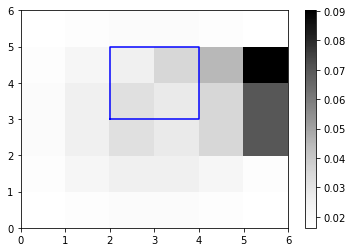

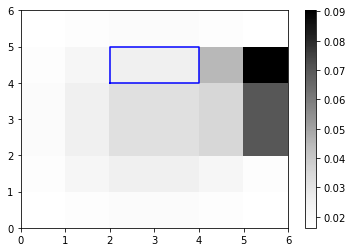

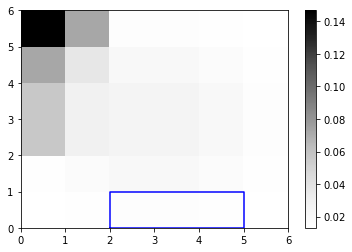

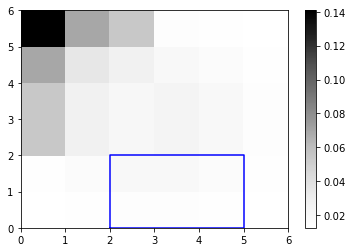

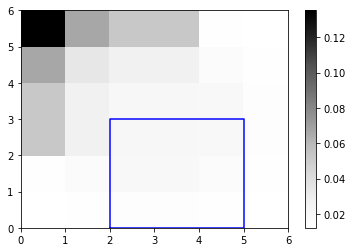

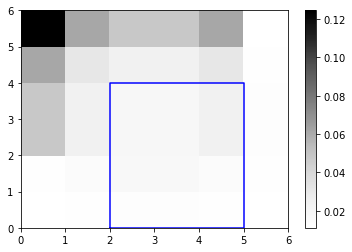

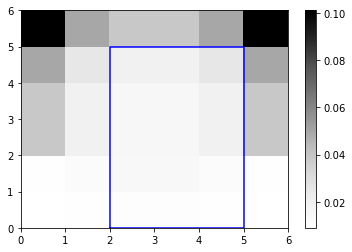

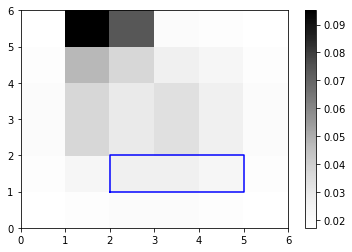

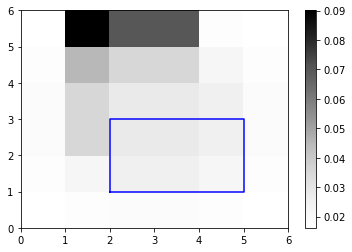

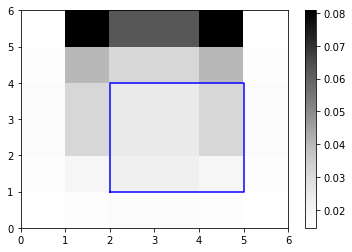

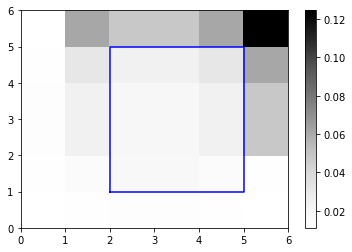

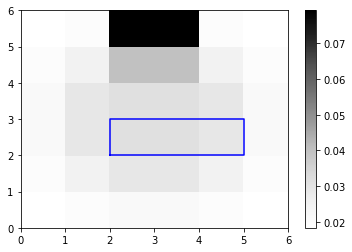

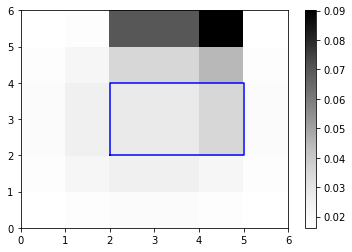

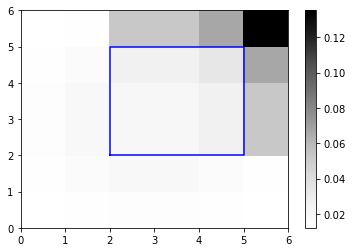

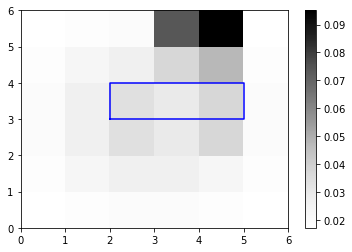

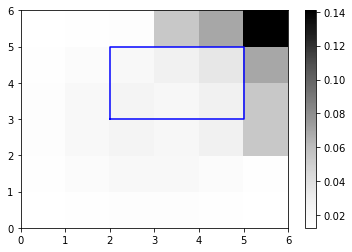

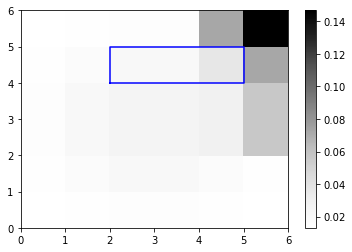

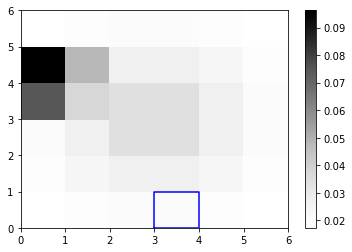

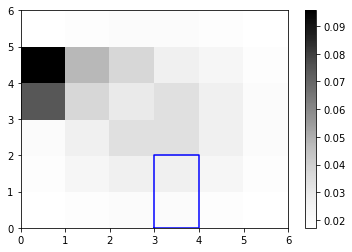

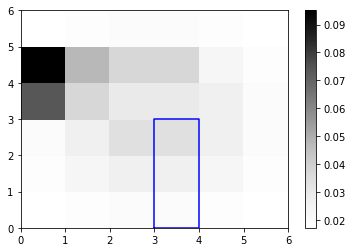

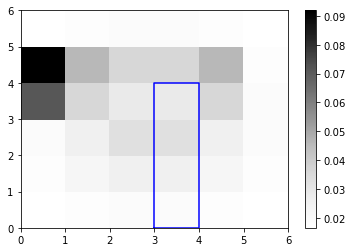

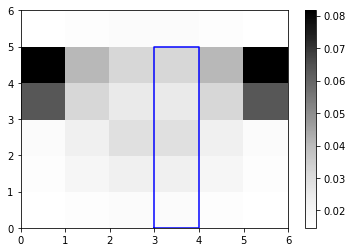

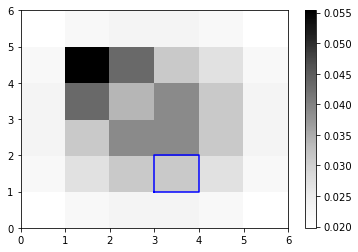

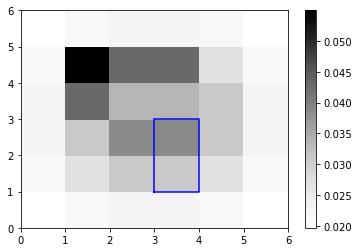

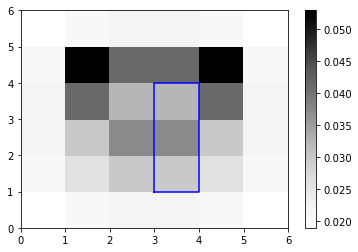

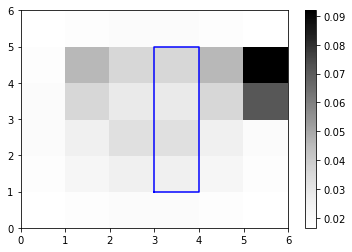

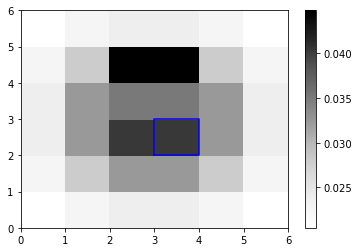

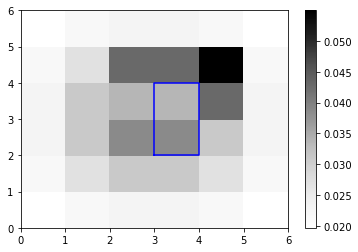

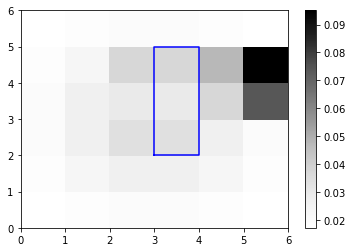

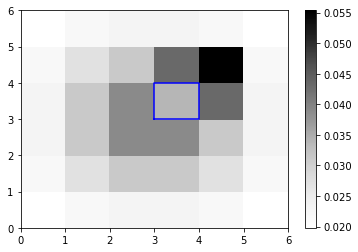

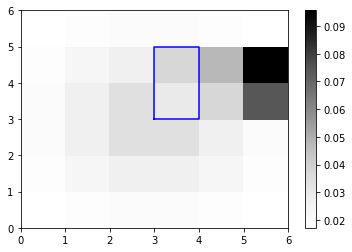

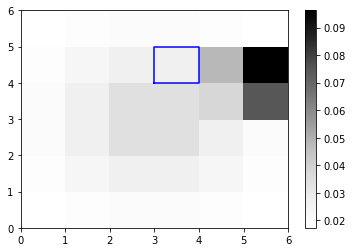

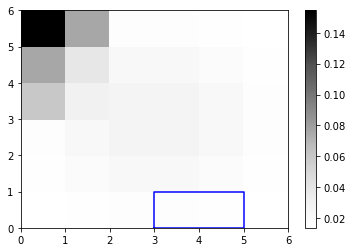

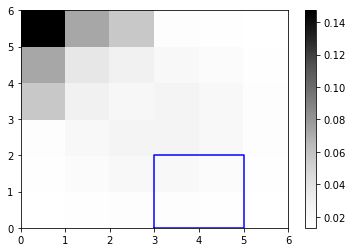

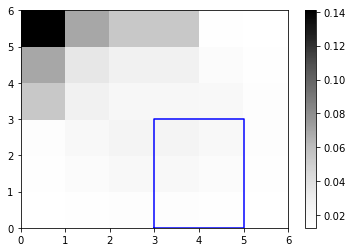

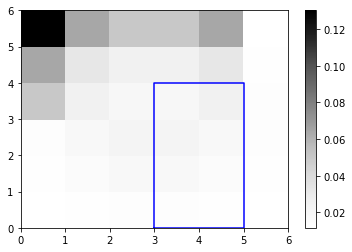

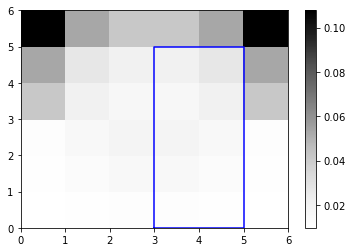

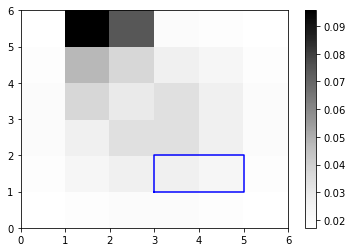

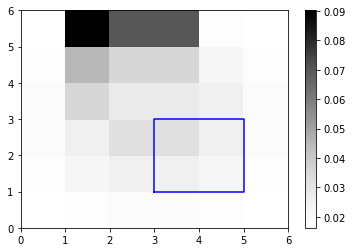

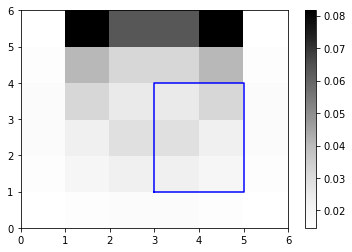

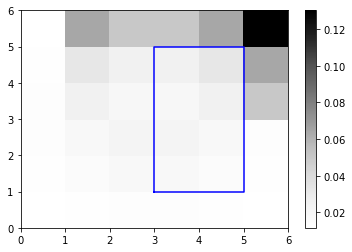

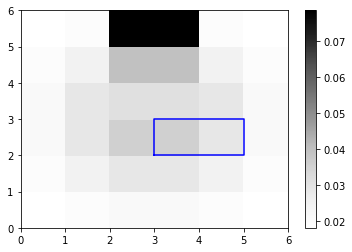

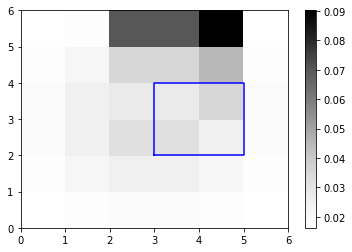

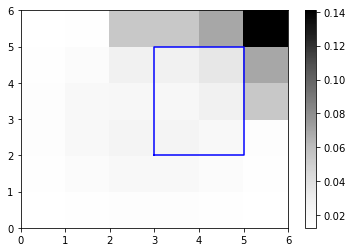

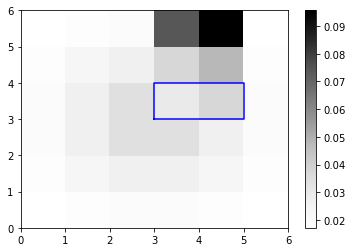

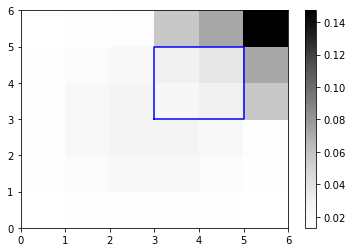

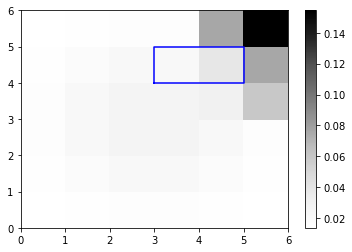

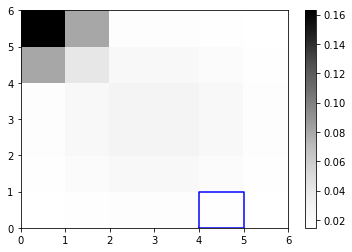

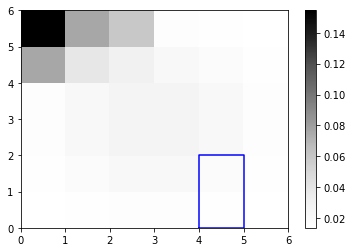

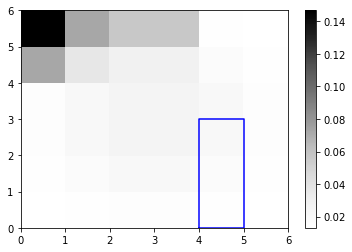

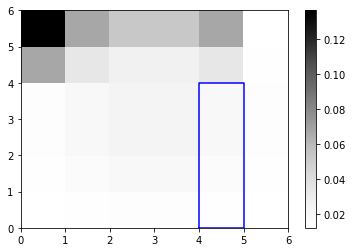

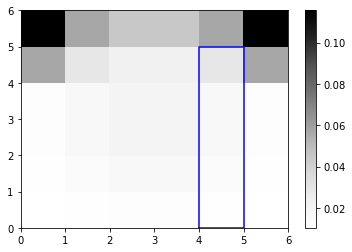

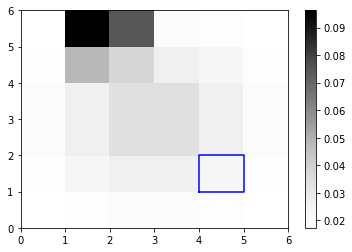

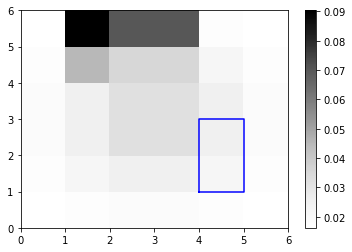

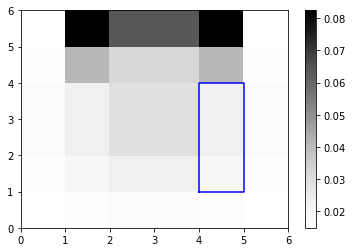

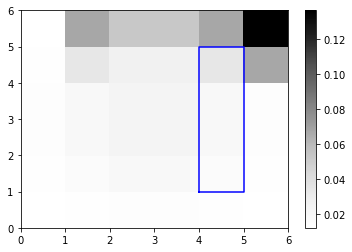

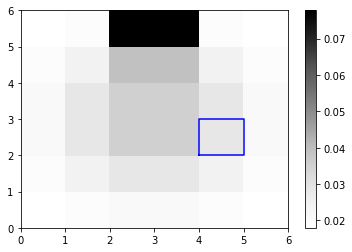

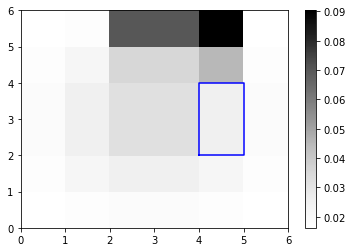

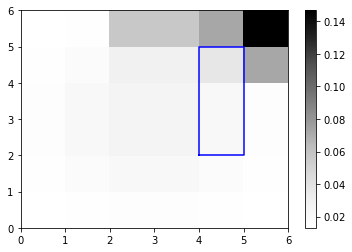

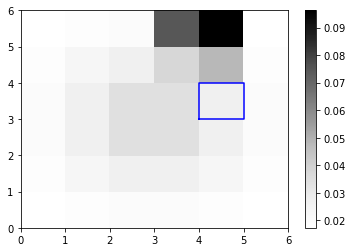

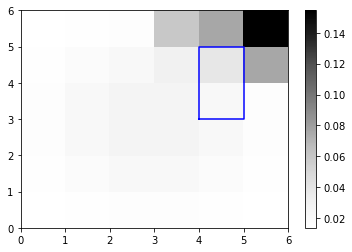

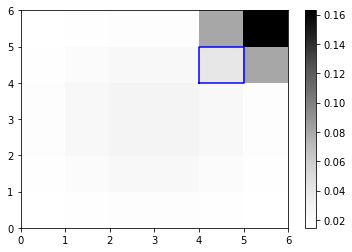

In [161]:
for i_h in range(0,len(Hypothesis)):
    histo=np.zeros([L,L]);
    h=Hypothesis[i_h];
    for i_x in range(0,len(points)):
        x=points[i_x];
        histo[x[0],x[1]]=sum(Posterior_T[i_h,i_x,:]);
    fig=plt.figure();      
    plt.pcolor(histo,cmap='Greys');  
    plt.colorbar();
    plt.plot([h[0],h[1],h[1],h[0],h[0]],[h[2],h[2],h[3],h[3],h[2]],'b')
    plt.show()
        

In [155]:
plt.clf()

In [157]:
Hypothesis[0]

[0, 1, 0, 1]